# How to use Divide and Conquer?

Maximum sum subarray problem

Strassen’s Matrix Multiplication

Tradeoffs vs brute force

# 1️⃣ Maximum Subarray Problem

## Problem

Given an array of integers (positive + negative), find the contiguous subarray with the maximum sum.

### Example:

arr = [−2, 1, −3, 4, −1, 2, 1, −5, 4]

means we have total n^2 possible combinations, n = length of arr

### Answer:

[4, −1, 2, 1] → sum = 6



In [1]:
def max_subarray_bruteforce(arr):
    n = len(arr)
    max_sum = float('-inf')

    for i in range(n):
        for j in range(i, n):
            current_sum = sum(arr[i:j+1])
            max_sum = max(max_sum, current_sum)

    return max_sum

Time Complexity:

O(n³) (because of sum inside loop)

## using Divide and Conquer

In [3]:

def max_subarray(arr, left, right):
    if left == right:
        return arr[left]

    mid = (left + right) // 2

    left_max = max_subarray(arr, left, mid)
    right_max = max_subarray(arr, mid+1, right)
    cross_max = max_crossing_sum(arr, left, mid, right)

    return max(left_max, right_max, cross_max)



def max_crossing_sum(arr, left, mid, right):
    left_sum = float('-inf')
    total = 0
    for i in range(mid, left-1, -1):
        total += arr[i]
        left_sum = max(left_sum, total)

    right_sum = float('-inf')
    total = 0
    for i in range(mid+1, right+1):
        total += arr[i]
        right_sum = max(right_sum, total)

    return left_sum + right_sum



# arr = [-2, 1, -3, 4, -1, 2, 1, -5, 4]

# result = max_subarray(arr, 0, len(arr) - 1)

# print(result)


## Recurrence Relation

T(n) = 2T(n/2) + O(n)

## Using Master Theorem

T(n) = O(n log n)

# 2️⃣ Strassen’s Matrix Multiplication

## Brute Force Matrix Multiplication

Normal matrix multiplication:

Time Complexity:

O(n^3)


# 🔥 Key Insight

Instead of 8 recursive multiplications,
Strassen reduces it to 7.

That’s the magic.


# 📘 Introduce
Volker Strassen

In 1969, he shocked the world by proving:

Matrix multiplication can be done in:

O(n^2.81)

## Using Brute Force:

Recurrence Relation:

T(n) = 8T(n/2) + O(n^2)

Master Theorem:

O(n^3)

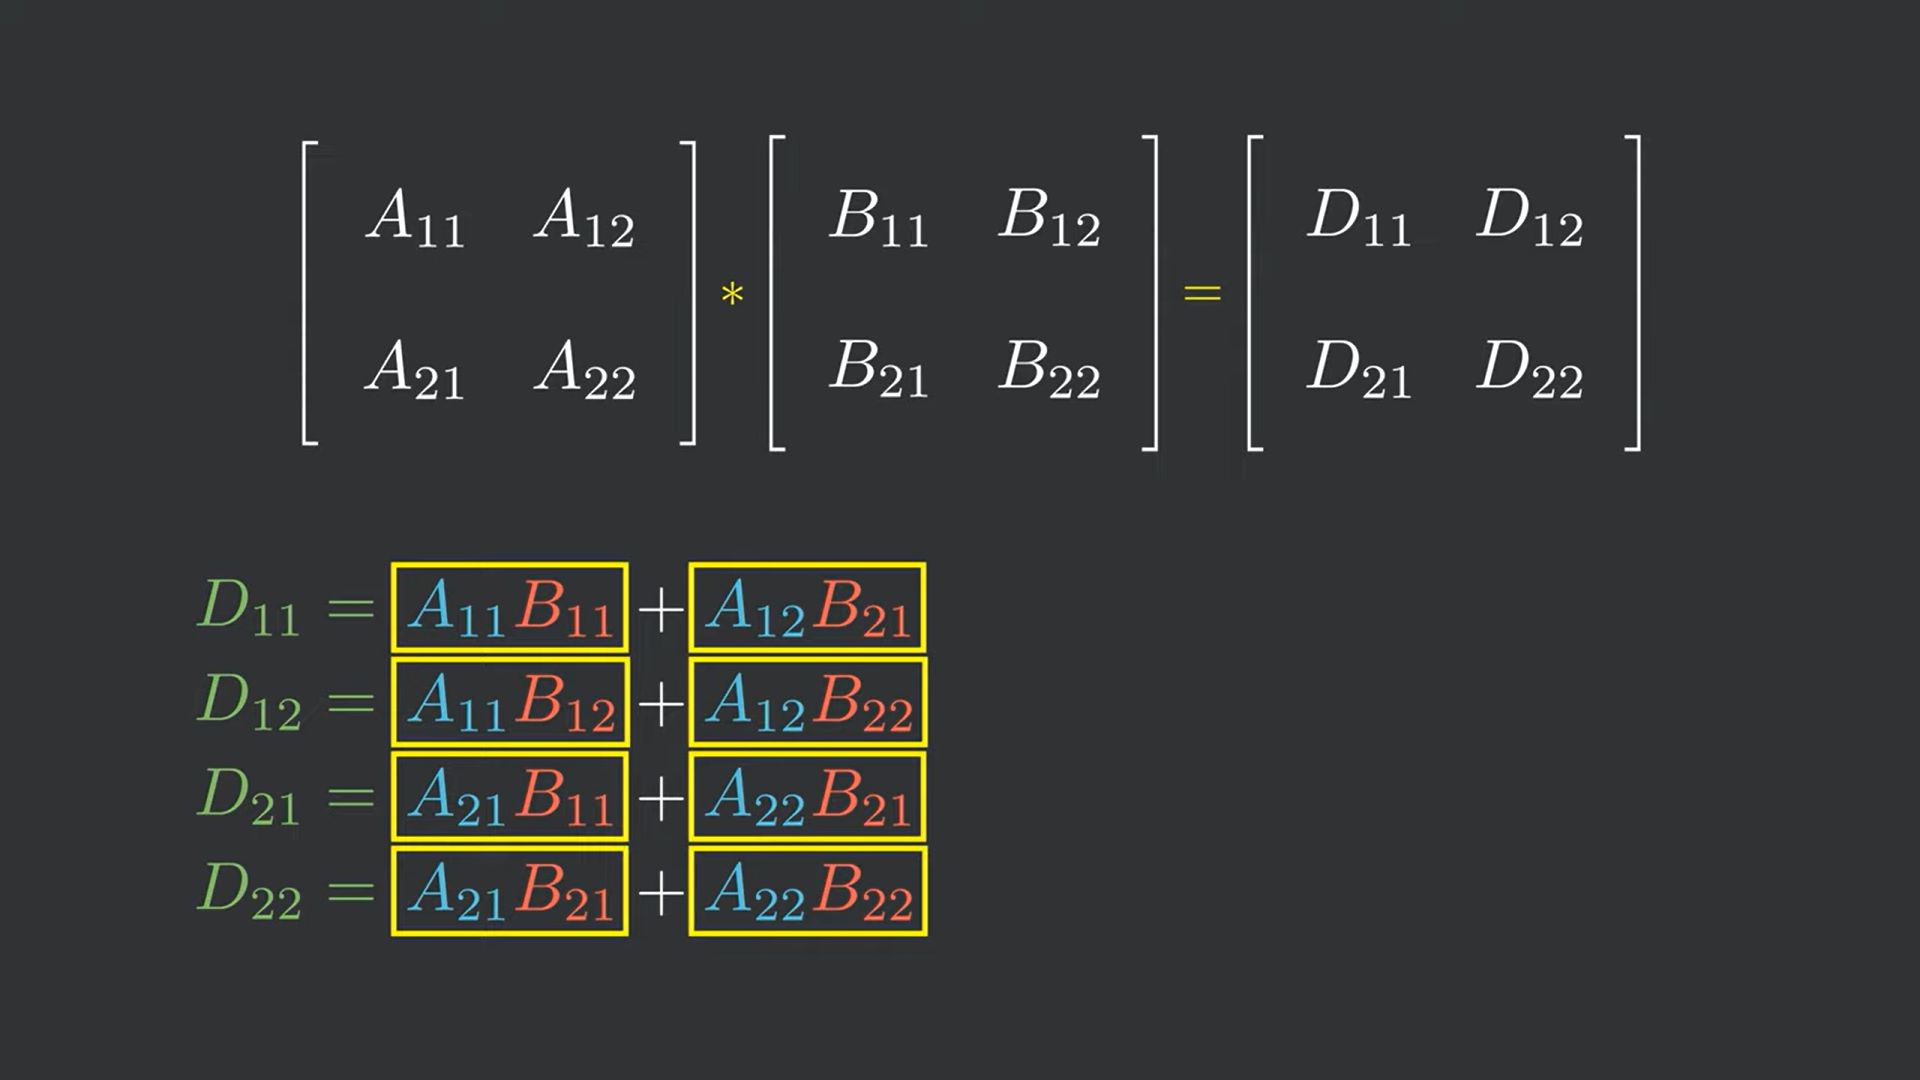

Using Strassen:

Recurrence Relation:

T(n) = 7T(n/2) + O(n^2)

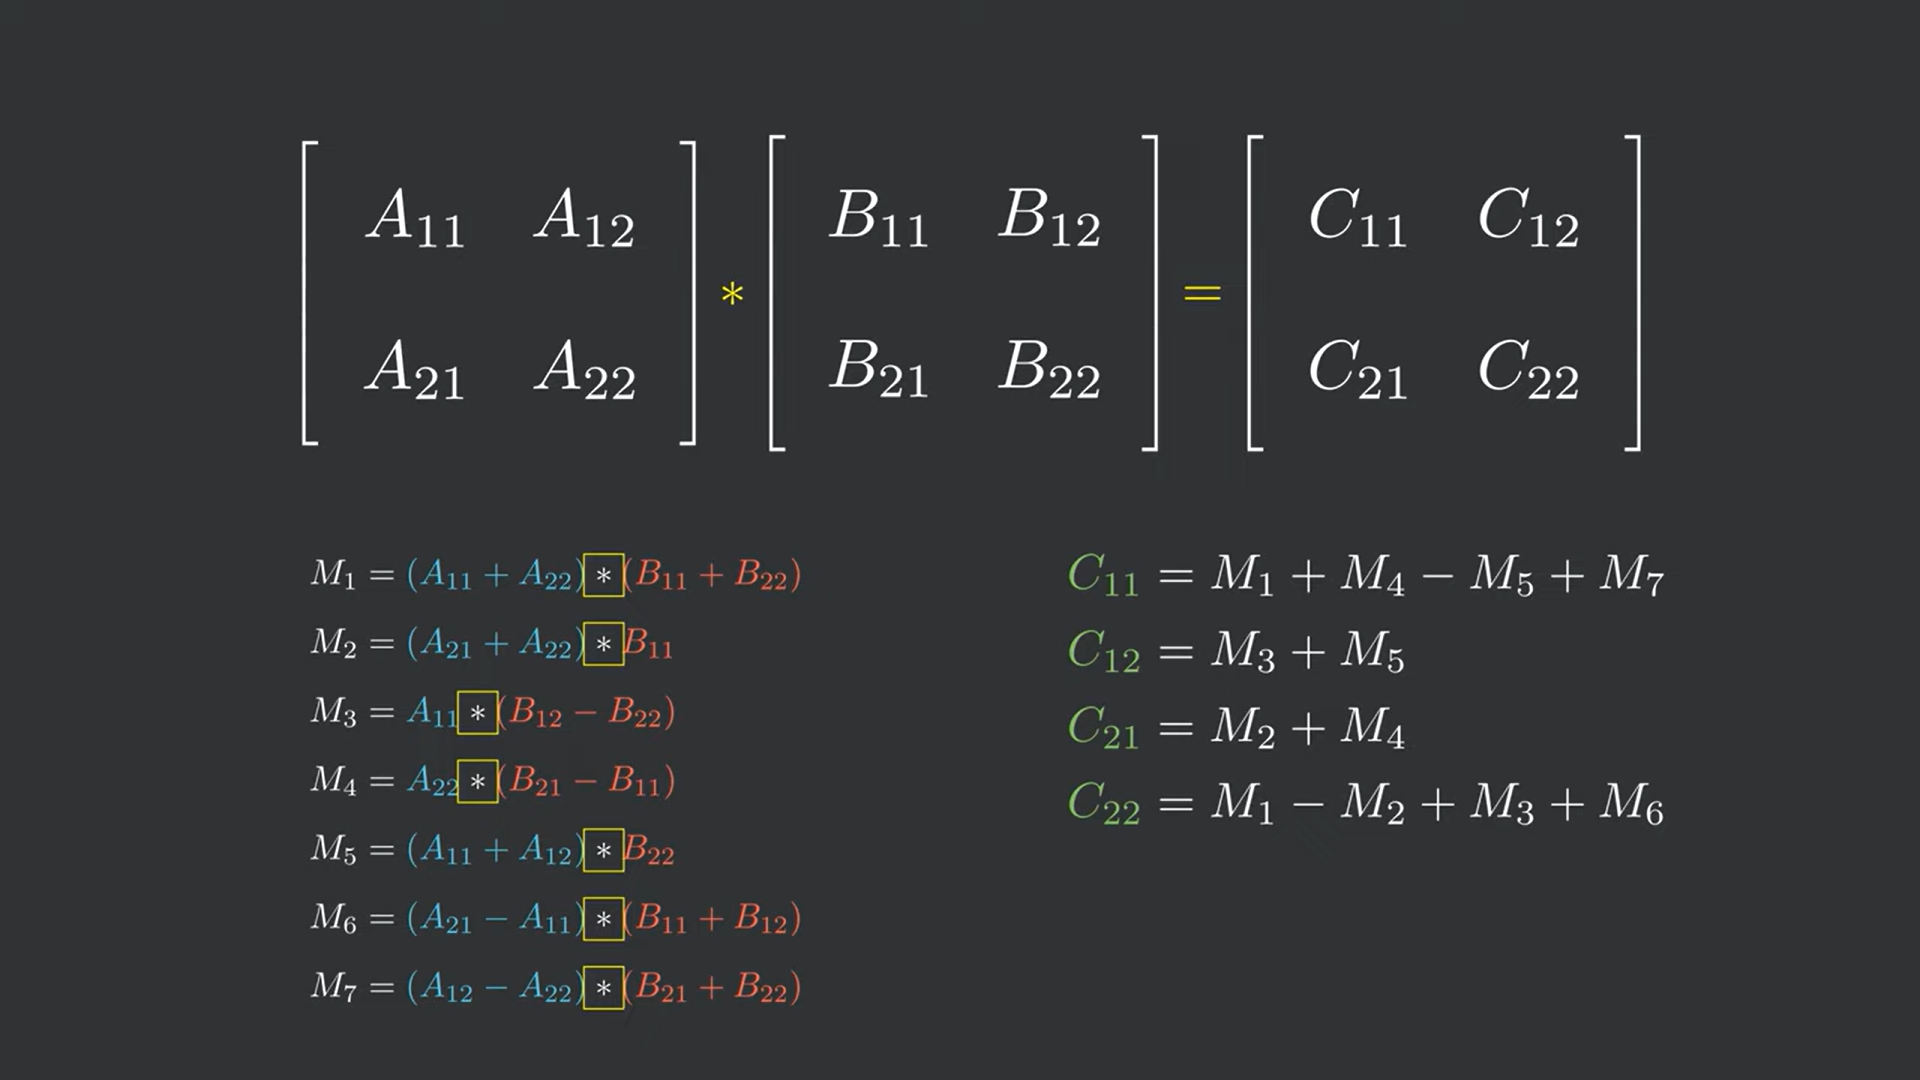

In [4]:
import numpy as np

def strassen(A, B):
    """
    Multiply two square matrices using Strassen's algorithm.
    Works for any n x n matrix; pads to next power of 2 if needed.
    """
    # Ensure matrices are numpy arrays
    A = np.array(A)
    B = np.array(B)

    # Find next power of 2
    n = max(A.shape + B.shape)
    m = 1
    while m < n:
        m *= 2

    # Pad matrices with zeros if needed
    A_pad = np.zeros((m, m), dtype=A.dtype)
    B_pad = np.zeros((m, m), dtype=B.dtype)
    A_pad[:A.shape[0], :A.shape[1]] = A
    B_pad[:B.shape[0], :B.shape[1]] = B

    # Compute Strassen
    C_pad = strassen_recursive(A_pad, B_pad)

    # Remove padding
    C = C_pad[:A.shape[0], :B.shape[1]]
    return C


def strassen_recursive(A, B):
    n = A.shape[0]

    # Base case: 1x1 matrix
    if n == 1:
        return A * B

    # Divide matrices into quadrants
    mid = n // 2
    A11 = A[:mid, :mid]
    A12 = A[:mid, mid:]
    A21 = A[mid:, :mid]
    A22 = A[mid:, mid:]

    B11 = B[:mid, :mid]
    B12 = B[:mid, mid:]
    B21 = B[mid:, :mid]
    B22 = B[mid:, mid:]

    # 7 Strassen products
    M1 = strassen_recursive(A11 + A22, B11 + B22)
    M2 = strassen_recursive(A21 + A22, B11)
    M3 = strassen_recursive(A11, B12 - B22)
    M4 = strassen_recursive(A22, B21 - B11)
    M5 = strassen_recursive(A11 + A12, B22)
    M6 = strassen_recursive(A21 - A11, B11 + B12)
    M7 = strassen_recursive(A12 - A22, B21 + B22)

    # Combine to get C quadrants
    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6

    # Merge quadrants
    top = np.hstack((C11, C12))
    bottom = np.hstack((C21, C22))
    C = np.vstack((top, bottom))
    return C

# Example 6x6 matrices
A = [
    [1, 2, 3, 4, 5, 6],
    [6, 5, 4, 3, 2, 1],
    [1, 1, 1, 1, 1, 1],
    [2, 2, 2, 2, 2, 2],
    [0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0]
]

B = [
    [6, 5, 4, 3, 2, 1],
    [1, 2, 3, 4, 5, 6],
    [0, 0, 1, 1, 0, 0],
    [1, 1, 0, 0, 1, 1],
    [2, 2, 2, 2, 2, 2],
    [3, 3, 3, 3, 3, 3]
]

# Call Strassen
C = strassen(A, B)

print("Result C (6x6):")
print(C)


Result C (6x6):
[[40 41 41 42 44 45]
 [51 50 50 49 47 46]
 [13 13 13 13 13 13]
 [26 26 26 26 26 26]
 [ 5  6  6  7  9 10]
 [ 8  7  7  6  4  3]]


# 3️⃣ Tradeoffs vs Brute Force

## Why don’t we always use Strassen?

Answer:

- Large constant factors
- More memory
- Numerical instability
- Worse for small n

Same for maximum subarray:
- D&C is O(n log n)
- Kadane is O(n)

So lesson:

Faster asymptotic complexity does NOT always mean better in practice.